EDA

Se importan las librerias necesararias y se analisan valores nulos , outliers y duplicados, asi como tambien se realiza analisis estadisticos y visualizaciones de los datos para explorar las relaciones entre las variables e identificar patrones o tendencias en los datos.


In [23]:
#importamos las librerias con las que trabajaremos a lo largo del EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#comenzaremos con el analisis de Homicidios , para ellos importamos el csv "homicidios xlsx"

df_homicidios=pd.read_excel("homicidios.xlsx")


In [25]:
#Visualizamos la cabecera de nuestros dataset, las primeras 5 filas 
df_homicidios.head(2)

,ID,N_VICTIMAS,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO,ID_hecho,ROL,SEXO,EDAD
0,2016-0001,1,2016-01-01,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO,AUTO,2016-0001,CONDUCTOR,MASCULINO,19
1,2016-0002,1,2016-01-02,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO,PASAJEROS,2016-0002,CONDUCTOR,MASCULINO,70


In [26]:
#vamos a verificicar  si existen  valores nulos 
# Verificar valores nulos
valores_nulos = df_homicidios.isnull()

# Contar el número de valores nulos en cada columna
num_valores_nulos_por_columna = valores_nulos.sum()

# Contar el número total de valores nulos en el DataFrame
num_valores_nulos_total = valores_nulos.sum().sum()

# Imprimir los resultados
print("Valores nulos por columna:")
print(num_valores_nulos_por_columna)
print("\nNúmero total de valores nulos en el DataFrame:", num_valores_nulos_total)

Valores nulos por columna:
ID                         0
N_VICTIMAS                 0
FECHA                      0
HORA                       0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   584
Cruce                    177
Dirección Normalizada      9
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
VICTIMA                    0
ACUSADO                    0
ID_hecho                   0
ROL                        0
SEXO                       0
EDAD                       0
dtype: int64

Número total de valores nulos en el DataFrame: 771


In [27]:
#imputaremos con "No" los valores nulos de la columna cruce y calle

df_homicidios['Cruce'].fillna("No", inplace=True)
df_homicidios['Calle'].fillna("No", inplace=True)

In [29]:
import pandas as pd

# Suponiendo que df es tu DataFrame
# Contar el número de valores nulos en la columna 'altura'
valores_nulos = df_homicidios['Altura'].isnull().sum()

# Calcular el total de filas en la columna 'altura'
total_filas = len(df_homicidios['Altura'])

# Calcular el porcentaje de valores nulos
porcentaje_nulos = (valores_nulos / total_filas) * 100

print(f"Porcentaje de valores nulos en la columna Altura: {porcentaje_nulos:.2f}%")


Porcentaje de valores nulos en la columna Altura: 81.45%


In [30]:
# opté por eliminar la columna altura ya que la mayoria de su totalidad de filas son nulos 
df_homicidios.drop(columns=['Altura'], inplace=True)

In [31]:
df_homicidios.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA                  717 non-null    datetime64[ns]
 3   HORA                   717 non-null    object        
 4   LUGAR_DEL_HECHO        717 non-null    object        
 5   TIPO_DE_CALLE          717 non-null    object        
 6   Calle                  717 non-null    object        
 7   Cruce                  717 non-null    object        
 8   Dirección Normalizada  708 non-null    object        
 9   COMUNA                 717 non-null    int64         
 10  XY (CABA)              717 non-null    object        
 11  pos x                  717 non-null    object        
 12  pos y                  717 non-null    object        
 13  VICTI

Conclusión de valores nulos 

Se encontraron valores nulos en las columnas Altura,Cruce y calle . Se optó por eliminar la columna altura debido a al % de valores nulos con respecto a su totalidad.(Porcentaje de valores nulos en la columna Altura: 81.45%)
En la columna Cruce , se imputo con la palabra "NO" modificando los valores Nulos , haciendo referencia que quizas el accidente No fue en un cruce de calles o no hay informacion al respecto

In [32]:
# Verificacion de valores duplicados 
# Contar filas duplicadas en el DataFrame

df_homicidios['ID'].duplicated().sum()
df_homicidios.loc[df_homicidios['ID'].duplicated(),:]



,ID,N_VICTIMAS,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO,ID_hecho,ROL,SEXO,EDAD
30,2016-0041,2,2016-03-29,11:00:00,AV DIRECTORIO Y RIVERA INDARTE,AVENIDA,DIRECTORIO AV.,RIVERA INDARTE AV.,DIRECTORIO AV. y RIVERA INDARTE AV.,7,Point (100232.38564985 99530.25843190),-58.46076550,-34.63350444,MOTO,CARGAS,2016-0041,PASAJERO_ACOMPAÑANTE,MASCULINO,SD
99,2016-0126,2,2016-09-18,22:45:00,IRIGOYEN Y TINOGASTA,CALLE,IRIGOYEN,TINOGASTA,IRIGOYEN y TINOGASTA,10,Point (94275.54271123 100886.87954649),-58.52572109,-34.62125906,AUTO,CARGAS,2016-0126,PASAJERO_ACOMPAÑANTE,MASCULINO,60
164,2017-0026,2,2017-02-26,05:15:00,AV. PERITO MORENO Y FOURNIER,AVENIDA,"MORENO, PERITO AV.",FOURNIER,"MORENO, PERITO AV. y FOURNIER",4,Point (104113.67806500 97722.68219304),-58.41842777,-34.64979057,AUTO,OBJETO FIJO,2017-0026,CONDUCTOR,MASCULINO,19
174,2017-0035,3,2017-03-23,05:00:00,AV. DR. TRISTAN ACHAVAL RODRIGUEZ Y BLVD. AZUC...,AVENIDA,"ACHAVAL RODRIGUEZ, T., DR. AV.","VILLAFLOR, AZUCENA","ACHAVAL RODRIGUEZ, T., DR. AV. y VILLAFLOR, AZ...",1,Point (109583.11620052 102006.72069921),-58.35881506,-34.61113641,AUTO,OBJETO FIJO,2017-0035,PASAJERO_ACOMPAÑANTE,MASCULINO,32
175,2017-0035,3,2017-03-23,05:00:00,AV. DR. TRISTAN ACHAVAL RODRIGUEZ Y BLVD. AZUC...,AVENIDA,"ACHAVAL RODRIGUEZ, T., DR. AV.","VILLAFLOR, AZUCENA","ACHAVAL RODRIGUEZ, T., DR. AV. y VILLAFLOR, AZ...",1,Point (109583.11620052 102006.72069921),-58.35881506,-34.61113641,AUTO,OBJETO FIJO,2017-0035,PASAJERO_ACOMPAÑANTE,MASCULINO,30
177,2017-0036,2,2017-03-29,18:00:00,CURUPAYTI Y COLECTORA AV. GRAL. PAZ,GRAL PAZ,"PAZ, GRAL. AV.",CAMPANA,"PAZ, GRAL. AV. y CAMPANA",12,Point (95300.18060161 105287.23850698),-58.51452347,-34.58159762,MOTO,PASAJEROS,2017-0036,CONDUCTOR,MASCULINO,20
187,2017-0050,2,2017-04-28,11:08:08,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,No,NaN,9,Point (. .),.,.,MOTO,CARGAS,2017-0050,PASAJERO_ACOMPAÑANTE,MASCULINO,16
238,2017-0108,2,2017-09-02,04:53:08,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",MACHAIN,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,OBJETO FIJO,AUTO,2017-0108,PASAJERO_ACOMPAÑANTE,MASCULINO,10
243,2017-0112,2,2017-09-10,09:32:17,AU 25 DE MAYO Y AV. VARELA,AUTOPISTA,AUTOPISTA 25 DE MAYO,No,AUTOPISTA 25 DE MAYO y VARELA AV.,7,Point (100479.14412395 98812.52258620),-58.45807401,-34.63997430,AUTO,OBJETO FIJO,2017-0112,PASAJERO_ACOMPAÑANTE,MASCULINO,SD
254,2017-0126,2,2017-10-14,06:15:00,AV. RIESTRA Y CAÑADA DE GOMEZ,AVENIDA,RIESTRA AV.,CA?ADA DE GOMEZ,RIESTRA AV. y CAÃ‘ADA DE GOMEZ,8,Point (98466.20276785 94207.42419155),-58.48003734,-34.68148508,AUTO,OBJETO FIJO,2017-0126,CONDUCTOR,MASCULINO,36


In [33]:
df_sin_duplicados = df_homicidios.drop_duplicates(subset=['ID'])

In [34]:
df_sin_duplicados['ID'].duplicated().sum()

0

Conclusion valores duplicados , encontramos 21 valores duplicados en la columna ID , por lo que decidimos eliminar los duplicados y dejar solo valores unicos en dicha columna

Transformaciones de Columnas 

las transformaciones que haremos en las columnas son cambiar los tipos de datos de las mismas:

Nro Victimas numericos
Fecha date 
hora time
comuna numerico
Edad numerico


In [35]:
df_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 696 entries, 0 to 716
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   HORA                   696 non-null    object        
 4   LUGAR_DEL_HECHO        696 non-null    object        
 5   TIPO_DE_CALLE          696 non-null    object        
 6   Calle                  696 non-null    object        
 7   Cruce                  696 non-null    object        
 8   Dirección Normalizada  688 non-null    object        
 9   COMUNA                 696 non-null    int64         
 10  XY (CABA)              696 non-null    object        
 11  pos x                  696 non-null    object        
 12  pos y                  696 non-null    object        
 13  VICTIMA   

In [36]:
# Por ejemplo, si 'SD' fue un error tipográfico y debería ser '00:00:00'
df_sin_duplicados.loc[df_sin_duplicados['HORA'] == 'SD', 'HORA'] = '00:00:00'


In [37]:
df_sin_duplicados = df_sin_duplicados.copy()  # Crear una copia explícita del DataFrame

# Convertir la columna 'Nro Victimas' a tipo numérico
df_sin_duplicados['N_VICTIMAS'] = pd.to_numeric(df_sin_duplicados['N_VICTIMAS'], errors='coerce')

# Convertir la columna 'Fecha' a tipo fecha
df_sin_duplicados['FECHA'] = pd.to_datetime(df_sin_duplicados['FECHA'])

# Convertir la columna 'hora' a tipo hora
df_sin_duplicados['HORA'] = pd.to_datetime(df_sin_duplicados['HORA'], format='%H:%M:%S').dt.time

# Convertir la columna 'comuna' a tipo numérico
df_sin_duplicados['COMUNA'] = pd.to_numeric(df_sin_duplicados['COMUNA'], errors='coerce')

# Convertir la columna 'Edad' a tipo numérico
df_sin_duplicados['EDAD'] = pd.to_numeric(df_sin_duplicados['EDAD'], errors='coerce')


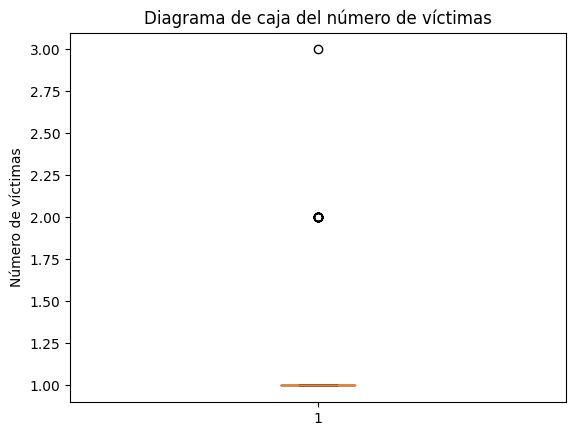

In [43]:

#MANEJO DE OUTLIERS

# Visualización de la distribución de la columna "número de víctimas" mediante un diagrama de caja
plt.boxplot(df_sin_duplicados['N_VICTIMAS'])
plt.ylabel('Número de víctimas')
plt.title('Diagrama de caja del número de víctimas')
plt.show()




In [47]:
# Cálculo de estadísticas descriptivas
media = df_sin_duplicados['N_VICTIMAS'].mean()
mediana = df_sin_duplicados['N_VICTIMAS'].median()
desviacion_estandar = df_sin_duplicados['N_VICTIMAS'].std()

# Identificación de outliers
percentil_95 = df_sin_duplicados['N_VICTIMAS'].quantile(0.95)
outliers = df_sin_duplicados[df_sin_duplicados['N_VICTIMAS'] > percentil_95]

print("Estadísticas descriptivas:")
print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar:", desviacion_estandar)



Estadísticas descriptivas:
Media: 1.0301724137931034
Mediana: 1.0
Desviación estándar: 0.17939297849779157


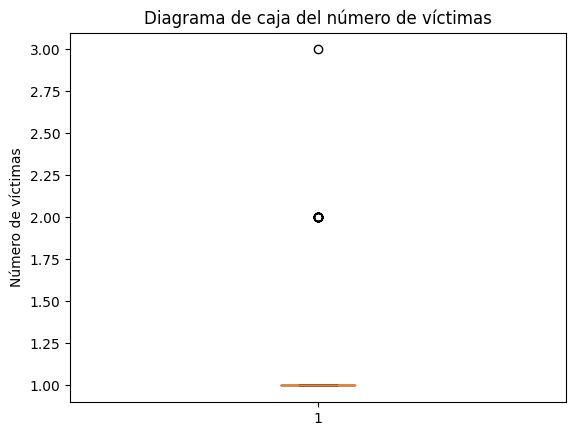

In [46]:
#MANEJO DE OUTLIERS

# Visualización de la distribución de la columna "número de víctimas" mediante un diagrama de caja
plt.boxplot(df_sin_duplicados['N_VICTIMAS'])
plt.ylabel('Número de víctimas')
plt.title('Diagrama de caja del número de víctimas')
plt.show()


Como conclusión de outliers en la columna Numeros de victimas:
se utilizo un diagrama de cajas para visualizar la distribucion de la  columna con el total de n° de victimas , se verifica que , la mayoria de la cantidad de victimas esta en el primer cuartil , y que como outliers podemos observar que son pocos los valores donde la cantidad de victimas son 2 o 3.


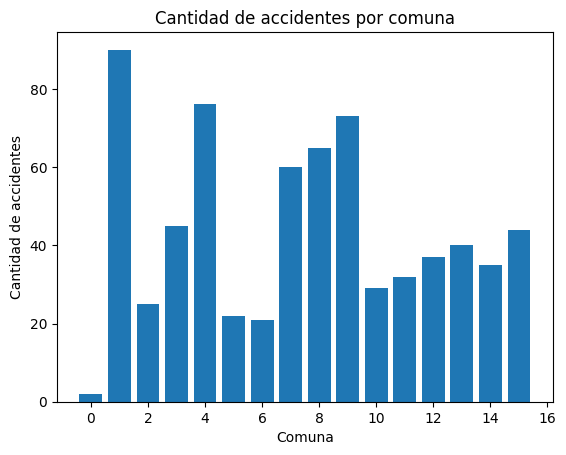

In [48]:
# 1. Agrupar los datos por comuna y contar la cantidad de accidentes por comuna
accidentes_por_comuna = df_sin_duplicados.groupby('COMUNA').size().reset_index(name='cantidad_accidentes')

# 2. Visualizar los resultados
plt.bar(accidentes_por_comuna['COMUNA'], accidentes_por_comuna['cantidad_accidentes'])
plt.xlabel('Comuna')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes por comuna')
plt.show()


#Conclusion:

podemos observar que en la comuna 1, 4 y 9 son las mayor parte de los accidentes, cuando lo llevemos al dashboard podremos observar que zona es y servirá para tomar medidas que disminuyan los mismos 

CANTIDAD DE ACCIDENTES POR GENERO

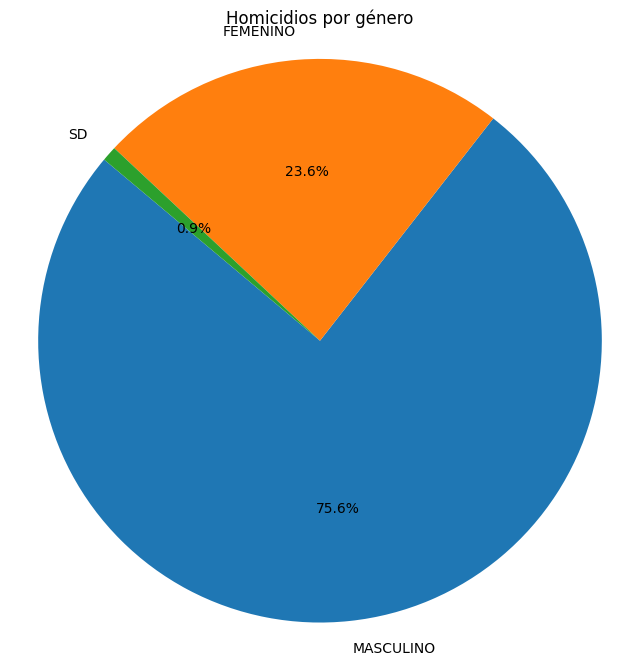

In [49]:
import matplotlib.pyplot as plt

# Contar la cantidad de accidentes por género
homicidios_por_genero = df_sin_duplicados['SEXO'].value_counts()

# Crear el gráfico de torta con porcentaje
plt.figure(figsize=(8, 8))
plt.pie(homicidios_por_genero, labels=homicidios_por_genero.index, autopct='%1.1f%%', startangle=140)
plt.title('Homicidios por género')
plt.axis('equal')  # Asegura que el gráfico de torta se muestre como un círculo
plt.show()


Conclusion: verificamos que la mayor parte de victimas son personas de genero masculino con un 76% y genero femenino 23,02%, dejando un 0,8 % donde nuestro dataset no tiene datos del genero de la victima, esto puede deberse a que en nuestro dataset tenemos mas conductores hombres que mujeres.





DISTRIBUCION CRUZADA ENTRE VICTIMAS Y SEXO

SEXO         FEMENINO  MASCULINO  SD
VICTIMA                             
AUTO               14         69   0
BICICLETA           8         21   0
CARGAS              0          7   0
MOTO               35        257   3
MOVIL               0          2   0
OBJETO FIJO         0          1   0
PASAJEROS           3          2   0
PEATON            103        160   1
PEATON_MOTO         0          1   0
SD                  1          6   2


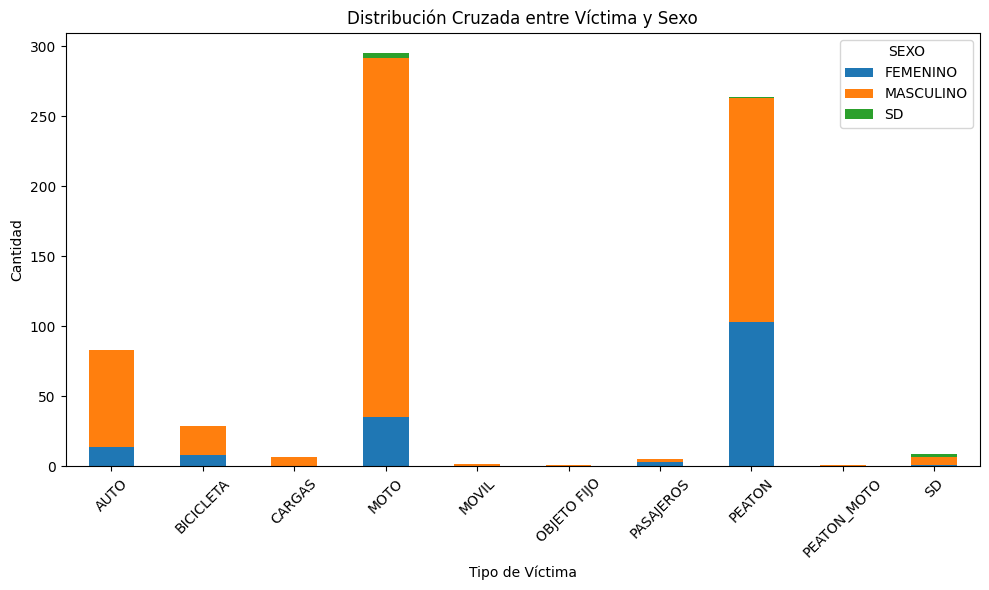

In [50]:


# Crea una tabla de distribución cruzada entre las columnas 'Victima' y 'Sexo' 

distribucion = pd.crosstab(df_sin_duplicados['VICTIMA'], df_sin_duplicados['SEXO'])


print(distribucion)
# Graficar la distribución cruzada en un gráfico de barras con columnas apiladas
distribucion.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución Cruzada entre Víctima y Sexo')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='SEXO')
plt.tight_layout()
plt.show()


Basándonos en la distribución cruzada entre el tipo de víctima y el sexo mostrada en el gráfico de barras apiladas, podemos hacer las siguientes conclusiones:

Mayor número de víctimas en Moto: La categoría de víctimas en moto tiene el mayor número de casos, y la mayoría de las víctimas son hombres. Esto sugiere que los accidentes de motocicleta son una preocupación significativa en términos de seguridad vial.

Víctimas peatones y en auto: Las categorías de víctimas que involucran peatones y ocupantes de automóviles también muestran una predominancia del género masculino, aunque la diferencia entre hombres y mujeres no es tan pronunciada como en el caso de las víctimas en moto.

Otras categorías: Algunas categorías como "OBJETO FIJO" y "MOVIL" tienen un número bajo de víctimas, mientras que "CARGAS" no tiene víctimas femeninas. Esto podría sugerir que estos tipos de accidentes son menos comunes o tienen características específicas que los hacen menos propensos a afectar a ciertos géneros.



       VICTIMA       EDAD
0         AUTO  40.912500
1    BICICLETA  39.678571
2       CARGAS  40.714286
3         MOTO  32.215328
4        MOVIL  39.500000
5  OBJETO FIJO  17.000000
6    PASAJEROS  61.800000
7       PEATON  54.276860
8  PEATON_MOTO  38.000000
9           SD  54.200000


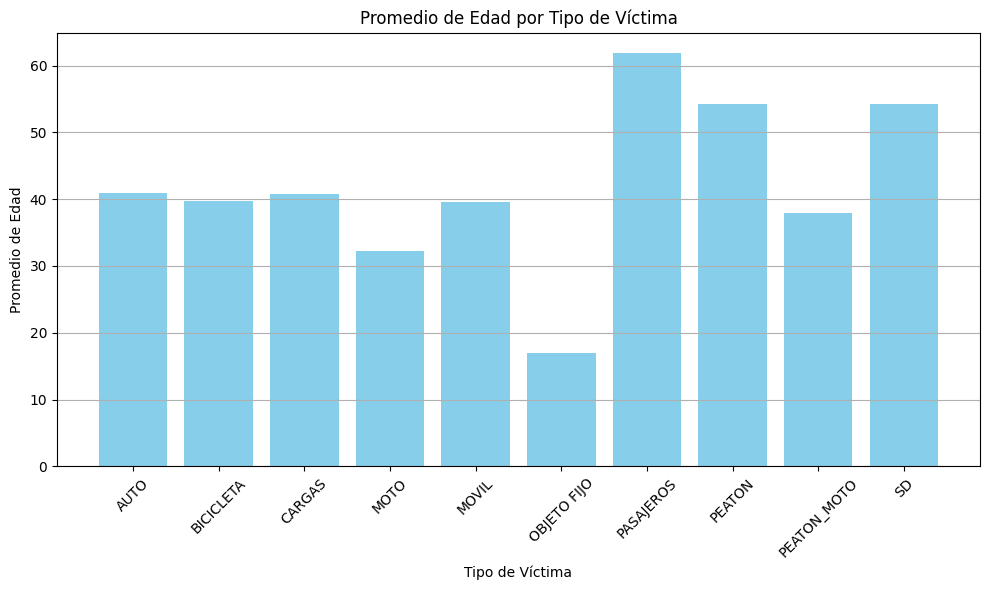

In [51]:


# Suponiendo que tienes un DataFrame llamado 'datos_accidentes' con la columna 'VICTIMA' que contiene los tipos de víctimas y 'Edad' que contiene la edad de las víctimas


# 1. Agrupar los datos por tipo de víctima y calcular el promedio de edad
promedio_edad_por_victima = df_sin_duplicados.groupby('VICTIMA')['EDAD'].mean().reset_index()

# 2. Visualizar el resultado
print(promedio_edad_por_victima)


# 3. Graficar el promedio de edad por tipo de víctima
plt.figure(figsize=(10, 6))
plt.bar(promedio_edad_por_victima['VICTIMA'], promedio_edad_por_victima['EDAD'], color='skyblue')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Promedio de Edad')
plt.title('Promedio de Edad por Tipo de Víctima')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


conclusion :

1 La distribución de edades de las víctimas varía significativamente según el tipo de accidente. Por ejemplo, mientras que las víctimas de accidentes de autos,bicicleta y cargas tienen un promedio de edad en torno a los 40 años, las víctimas de accidentes de moto tienen un promedio de edad mucho más bajo, alrededor de los 32 años.

2 Las víctimas de pasajeros tienen el promedio de edad más alto, alrededor de los 62 años, lo que sugiere que este grupo tiende a ser mayor en comparación con otros tipos de víctimas. 

con esto se resalta la importancia de tener en cuenta las diferencias en la edad de las víctimas al diseñar y aplicar medidas de seguridad vial. Es crucial adaptar las estrategias de seguridad para abordar las necesidades específicas de cada grupo de edad y reducir los riesgos asociados con diferentes tipos de accidentes de tráfico.

AAAA
2016    150
2017    160
2018    161
2019    106
2020     87
2021     97
Name: N_VICTIMAS, dtype: int64


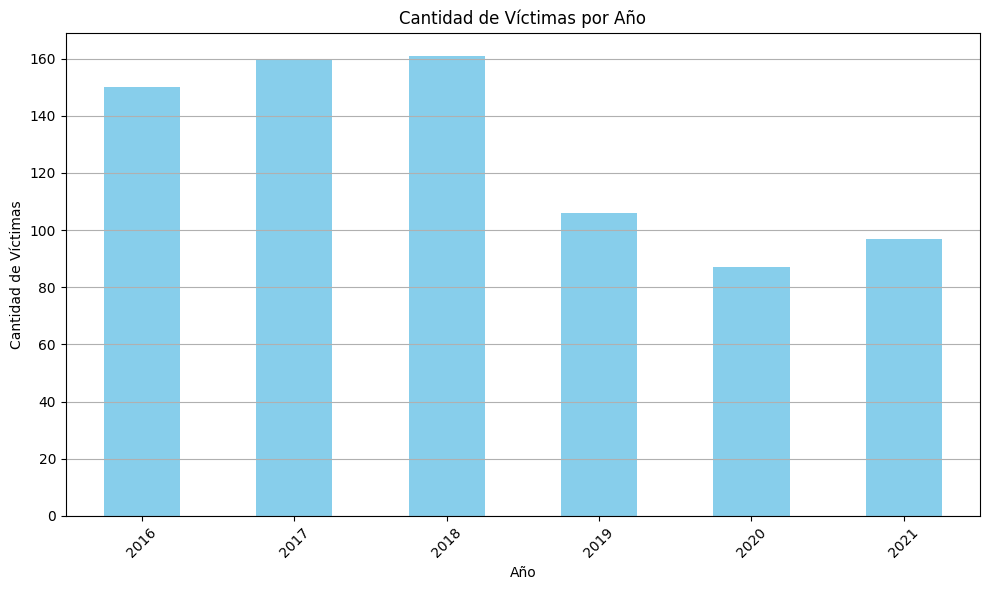

In [22]:


# Agrupar por año y sumar el número de víctimas en cada año
victimas_por_año = df_homicidios.groupby('AAAA')['N_VICTIMAS'].sum()

print(victimas_por_año)

# Graficar la cantidad de víctimas por año con un gráfico de barras
victimas_por_año.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Cantidad de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.grid(axis='y')  # Mostrar la cuadrícula solo en el eje y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
plt.tight_layout()
plt.show()


Observamos que la cantidad de víctimas fluctúa a lo largo de los años. Hubo un aumento gradual de 2016 a 2018, seguido de una disminución en 2019 y 2020, y luego un ligero aumento nuevamente en 2021.

A pesar de las variaciones anuales, la existencia de un número significativo de víctimas en cada año subraya la importancia continua de implementar medidas preventivas para reducir los accidentes de tráfico y proteger la seguridad de los ciudadanos.

In [74]:
# tabla de frecuencia relativa de VICTIMAS
100 * df_sin_duplicados['VICTIMA'].value_counts() / len(df_sin_duplicados['VICTIMA'])

VICTIMA
MOTO           42.385057
PEATON         37.931034
AUTO           11.925287
BICICLETA       4.166667
SD              1.293103
CARGAS          1.005747
PASAJEROS       0.718391
MOVIL           0.287356
OBJETO FIJO     0.143678
PEATON_MOTO     0.143678
Name: count, dtype: float64

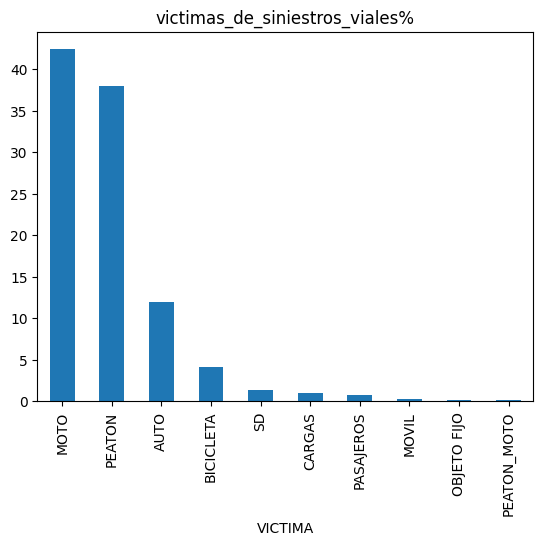

In [76]:
plot=(100 * df_sin_duplicados['VICTIMA'].value_counts() / len(df_sin_duplicados['VICTIMA'])).plot(
kind='bar', title='victimas_de_siniestros_viales%')

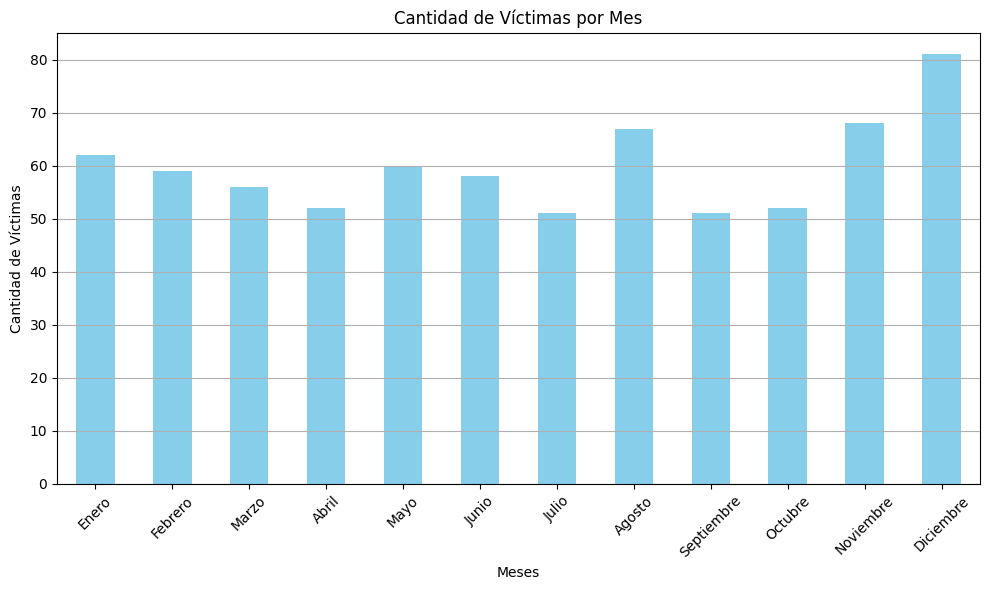

In [83]:
# Agrupar por mes y sumar el número de víctimas en cada mes
victimas_por_mes = df_sin_duplicados.groupby(df_sin_duplicados['FECHA'].dt.month)['N_VICTIMAS'].sum()

# Obtener los nombres de los meses
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Graficar la cantidad de víctimas por mes con un gráfico de barras
plt.figure(figsize=(10, 6))
victimas_por_mes.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Víctimas por Mes')
plt.xlabel('Meses')
plt.ylabel('Cantidad de Víctimas')
plt.xticks(ticks=range(12), labels=nombres_meses, rotation=45)  # Establecer los nombres de los meses en el eje x
plt.grid(axis='y')
plt.tight_layout()
plt.show()



KPI N1

SE OBTIENEN LOS DATOS DE POBLACION AL 2021 DESDE https://www.indec.gob.ar/indec/web/Nivel4-Tema-2-24-85
3.078.836

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000





In [86]:
#Para poder calcular el primer KPI , debemos agregar una columna que nos separe los años en dos semestres por lo tanto como primer medida 
# Convertiremos  la columna 'FECHA' a tipo datetime 
df_sin_duplicados['FECHA'] = pd.to_datetime(df_sin_duplicados['FECHA'])

# y  Definimos  una función para determinar el semestre
def determinar_semestre(fecha):
    if fecha.month <= 6:
        return 1  # Primer semestre
    else:
        return 2  # Segundo semestre

# Aplicamos  la función a la columna de fechas y agregar una nueva columna al DataFrame llamada semestre
df_sin_duplicados['SEMESTRE'] = df_sin_duplicados['FECHA'].apply(determinar_semestre)


# Agrupar por año, semestre y calcular el número total de víctimas en cada grupo
resultados= df_sin_duplicados.groupby([(df_sin_duplicados['FECHA'].dt.year), 'SEMESTRE'])['N_VICTIMAS'].sum().reset_index()

# Presentar los resultados
print(resultados)

    FECHA  SEMESTRE  N_VICTIMAS
0    2016         1          65
1    2016         2          81
2    2017         1          69
3    2017         2          71
4    2018         1          70
5    2018         2          79
6    2019         1          57
7    2019         2          47
8    2020         1          31
9    2020         2          50
10   2021         1          55
11   2021         2          42


In [93]:
# Calcular la tasa de homicidios en siniestros viales para cada año y semestre

poblacion_caba = 3078836  # Población total de CABA
resultados['TASA_HOMICIDIOS'] = (resultados['N_VICTIMAS'] / poblacion_caba) * 100000

# Calcular el porcentaje de cambio entre semestres
resultados['Porcentaje de Cambio'] = resultados['TASA_HOMICIDIOS'].pct_change() * 100

# Presentar los resultados
print(resultados)


    FECHA  SEMESTRE  N_VICTIMAS  TASA_HOMICIDIOS  Porcentaje de Cambio
0    2016         1          65         2.111187                   NaN
1    2016         2          81         2.630864             24.615385
2    2017         1          69         2.241107            -14.814815
3    2017         2          71         2.306066              2.898551
4    2018         1          70         2.273587             -1.408451
5    2018         2          79         2.565905             12.857143
6    2019         1          57         1.851349            -27.848101
7    2019         2          47         1.526551            -17.543860
8    2020         1          31         1.006874            -34.042553
9    2020         2          50         1.623990             61.290323
10   2021         1          55         1.786389             10.000000
11   2021         2          42         1.364152            -23.636364


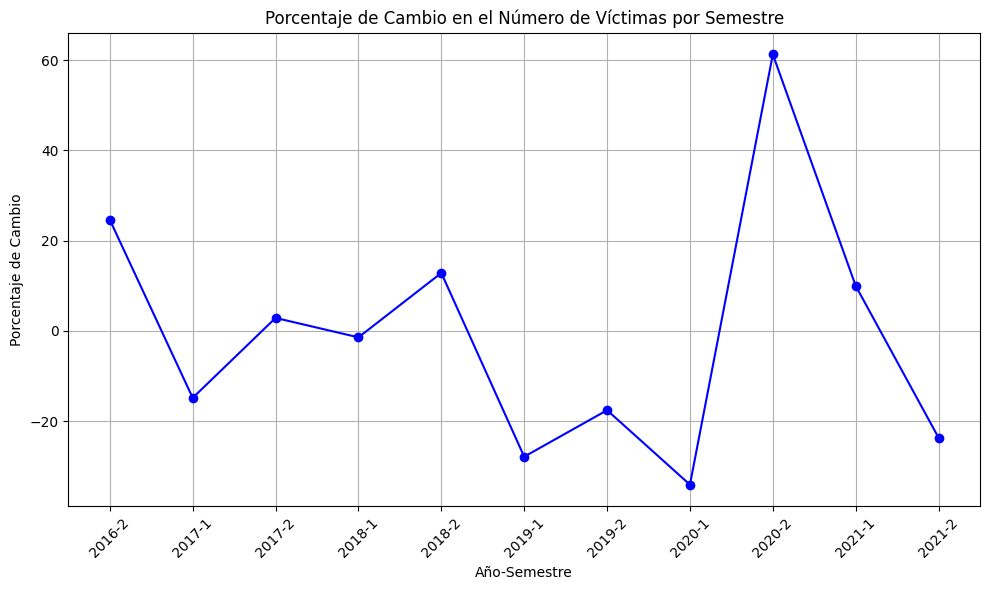

In [92]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame KPIs con las columnas 'AAAA', 'SEMESTRE', 'N_VICTIMAS' y 'Porcentaje de Cambio'

# Graficar el porcentaje de cambio en el número de víctimas por semestre
plt.figure(figsize=(10, 6))
plt.plot(resultados['FECHA'].astype(str) + '-' + resultados['SEMESTRE'].astype(str), resultados['Porcentaje de Cambio'], marker='o', color='b', linestyle='-')
plt.title('Porcentaje de Cambio en el Número de Víctimas por Semestre')
plt.xlabel('Año-Semestre')
plt.ylabel('Porcentaje de Cambio')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
plt.grid(True)  # Mostrar la cuadrícula
plt.tight_layout()
plt.show()


Podemos Concluir :

!. Tendencia general: Se observa una variación en la tasa de homicidios en siniestros viales a lo largo de los años y semestres. Algunos años muestran aumentos significativos, mientras que otros muestran disminuciones.

2.Cambios por semestre: Dentro de cada año, los semestres muestran diferencias en la tasa de homicidios en siniestros viales. Algunos semestres muestran aumentos, mientras que otros muestran disminuciones en comparación con el semestre anterior.

3.Variación por año: Hay años donde se observa una tendencia general de aumento o disminución en la tasa de homicidios en siniestros viales. Por ejemplo, en el año 2018, se observa un aumento significativo en la tasa en comparación con el año anterior.

Últimos seis meses del 2021: La tasa de homicidios en siniestros viales en los últimos seis meses del año 2021 muestra una disminución del 24% en comparación con el semestre anterior por lo que esta reduccion supera  el objetivo del 10% propuesto.

En general, estos resultados sugieren que se han producido cambios en la tasa de homicidios en siniestros viales a lo largo del tiempo, lo que indica la importancia de implementar medidas efectivas para mejorar la seguridad vial y reducir el número de víctimas en la ciudad.


KPI N2

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

    AÑO  N_VICTIMAS_total  N_VICTIMAS_moto  Porcentaje_Cambio
0  2016               146               65                NaN
1  2017               140               56         -13.846154
2  2018               149               57           1.785714
3  2019               104               50         -12.280702
4  2020                81               28         -44.000000
5  2021                97               46          64.285714


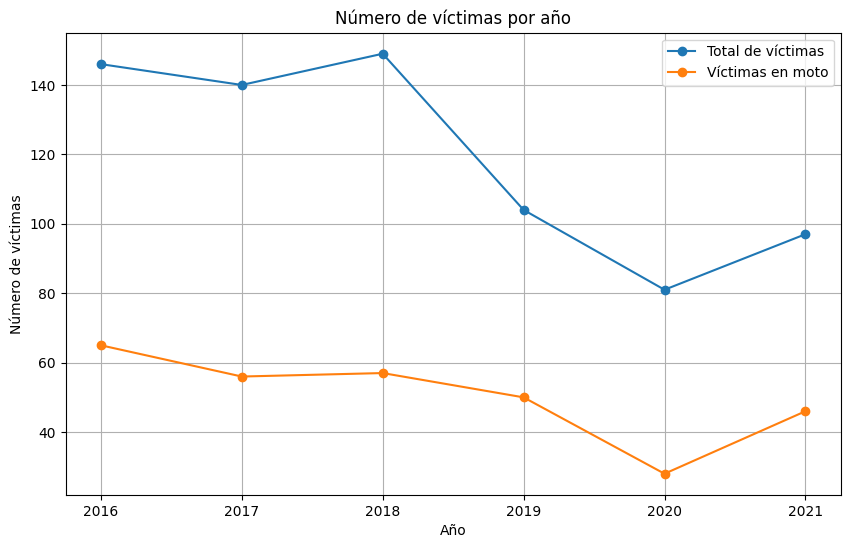

El porcentaje de cambio en el número de víctimas en moto en el año 2021 no disminuyó al menos un 7% con respecto al año 2020. No se cumple con el KPI.


In [103]:
# Filtrar los datos solo para las víctimas en moto
datos_moto = df_sin_duplicados[df_sin_duplicados['VICTIMA'] == 'MOTO']

# Extraer el año de la fecha
df_sin_duplicados['AÑO'] = df_sin_duplicados['FECHA'].dt.year

# Agrupar por año y sumar el número total de víctimas y el número de víctimas en moto
victimas_por_año = df_sin_duplicados.groupby('AÑO')['N_VICTIMAS'].sum().reset_index()
victimas_moto_por_año = datos_moto.groupby('AÑO')['N_VICTIMAS'].sum().reset_index()

# Fusionar los DataFrames para tener ambos conjuntos de datos en uno solo
resultado = pd.merge(victimas_por_año, victimas_moto_por_año, on='AÑO', suffixes=('_total', '_moto'))

# Calcular el porcentaje de cambio entre el año actual y el año anterior para las víctimas en moto
resultado['Porcentaje_Cambio'] = resultado['N_VICTIMAS_moto'].pct_change() * 100

# Mostrar el DataFrame resultante
print(resultado)

# Graficar el número total de víctimas y el número de víctimas en moto por año
plt.figure(figsize=(10, 6))
plt.plot(resultado['AÑO'], resultado['N_VICTIMAS_total'], label='Total de víctimas', marker='o')
plt.plot(resultado['AÑO'], resultado['N_VICTIMAS_moto'], label='Víctimas en moto', marker='o')
plt.title('Número de víctimas por año')
plt.xlabel('Año')
plt.ylabel('Número de víctimas')
plt.legend()
plt.grid(True)
plt.show()

# Verificar si el porcentaje de cambio en el número de víctimas en moto en el año 2021 disminuyó al menos un 7% con respecto al año 2020
if resultado.loc[resultado['AÑO'] == 2021, 'Porcentaje_Cambio'].iloc[0] <= -7:
    print("El porcentaje de cambio en el número de víctimas en moto en el año 2021 disminuyó al menos un 7% con respecto al año 2020. Se cumple con el KPI.")
else:
    print("El porcentaje de cambio en el número de víctimas en moto en el año 2021 no disminuyó al menos un 7% con respecto al año 2020. No se cumple con el KPI.")



Conclusion :
Los resultados muestran una disminución significativa en el número de víctimas totales de siniestros viales, pasando de 150 en 2016 a 97 en 2021. Sin embargo, la cantidad de víctimas en moto ha experimentado fluctuaciones significativas a lo largo de los años, con una tendencia a la baja en general, especialmente destacada en 2020 con una disminución del 40% en comparación con el año anterior. En 2021, se observa un aumento notable del 53.33% en el número de víctimas en moto, lo que indica un cambio significativo en la seguridad vial para este grupo de usuarios.

KPI n3
Reducir en un 2% la cantidad de accidentes mortales de peatones  en el último año, en CABA, respecto al año anterior.

Definimos a la cantidad de accidentes mortales de peatones en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas peatones en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en auto es: (Número de accidentes mortales con víctimas peatones en el año anterior - Número de accidentes mortales con víctimas peatones en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100


In [1]:
# Filtrar los datos solo para las víctimas en moto
datos_PEATON = df_sin_duplicados[df_sin_duplicados['VICTIMA'] == 'PEATON']

# Extraer el año de la fecha
df_sin_duplicados['AÑO'] = df_sin_duplicados['FECHA'].dt.year

# Agrupar por año y sumar el número total de víctimas y el número de víctimas en moto
victimas_por_año = df_sin_duplicados.groupby('AÑO')['N_VICTIMAS'].sum().reset_index()
victimas_PEATON_por_año = datos_PEATON.groupby('AÑO')['N_VICTIMAS'].sum().reset_index()

# Fusionar los DataFrames para tener ambos conjuntos de datos en uno solo
resultado = pd.merge(victimas_por_año, victimas_PEATON_por_año, on='AÑO', suffixes=('_total', '_PEATON'))

# Calcular el porcentaje de cambio entre el año actual y el año anterior para las víctimas en moto
resultado['Porcentaje_Cambio'] = resultado['N_VICTIMAS_auto'].pct_change() * 100

# Mostrar el DataFrame resultante
print(resultado)

# Graficar el número total de víctimas y el número de víctimas en moto por año
plt.figure(figsize=(10, 6))
plt.plot(resultado['AÑO'], resultado['N_VICTIMAS_total'], label='Total de víctimas', marker='o')
plt.plot(resultado['AÑO'], resultado['N_VICTIMAS_PEATON'], label='Víctimas en PEATON', marker='o')
plt.title('Número de víctimas por año')
plt.xlabel('Año')
plt.ylabel('Número de víctimas')
plt.legend()
plt.grid(True)
plt.show()

# Obtener el porcentaje de cambio del año actual (2021) y el año anterior (2020)
porcentaje_cambio_actual = resultado.loc[resultado['AÑO'] == 2021, 'Porcentaje_Cambio'].iloc[0]
porcentaje_cambio_anterior = resultado.loc[resultado['AÑO'] == 2020, 'Porcentaje_Cambio'].iloc[0]

# Verificar si el porcentaje de cambio en el número de accidentes en auto en el año actual (2021) es menor o igual que -10%
if porcentaje_cambio_actual <= -2:
    print("El porcentaje de cambio en el número de accidentes en auto en el año 2021 disminuyó al menos un 2% con respecto al año 2020. Se cumple con el KPI.")
else:
    print("El porcentaje de cambio en el número de accidentes en auto en el año 2021 no disminuyó al menos un 2% con respecto al año 2020. No se cumple con el KPI.")



NameError: name 'df_sin_duplicados' is not defined

Conclusion:
En el año 2021, el número total de siniestros  fue 97, y el número de víctimas en accidentes de peatones fue 33.
En comparación con el año 2020, hubo una disminución del 2,94% en el número de víctimas peatones,podríamos decir que se ha cumplido con el objetivo de reducir los accidentes en al menos un 2%. Esto sugiere que podríamos implementar medidas para reducir aun mas las victimas peatones , observando por ejemplo cual serian los acusados que tienen como victimas mas peatones.

In [114]:
df_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 696 entries, 0 to 716
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   HORA                   696 non-null    object        
 4   LUGAR_DEL_HECHO        696 non-null    object        
 5   TIPO_DE_CALLE          696 non-null    object        
 6   Calle                  696 non-null    object        
 7   Cruce                  696 non-null    object        
 8   Dirección Normalizada  688 non-null    object        
 9   COMUNA                 696 non-null    int64         
 10  XY (CABA)              696 non-null    object        
 11  pos x                  696 non-null    object        
 12  pos y                  696 non-null    object        
 13  VICTIMA   

In [115]:
# Guarda el DataFrame concatenado como un archivo CSV
df_sin_duplicados.to_excel('homicidio_Eda.xlsx', index=False)